## IMPORTS

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
from docplex.mp.model import Model
import docplex.mp.solution as Solution

## FUNÇÕES

In [35]:
def CreateLocation(amount):
    return [i for i in range(amount)]

def CreatePath(location):
    #The creation of paths obey one restriction, they cannot connect a node - or 
    #location - with itself, so we avoid that writing a IF at the end of a list 
    #comprehention
    return [(i,j) for i in location for j in location if i!=j]

In [36]:
def RandCoordinates(ammount):
    random = np.random
    random.seed(1)
    X = np.round(random.rand(n)*1000,1)
    Y = np.round(random.rand(n)*1000,1)
  
    return X,Y

In [37]:
def plotMap(x,y):
    plt.figure(figsize=(12,8))
    plt.scatter(x,y,color='blue')
    s=[]
    for n in range(len(x)):
        s_temp=[]
        s_temp.append("%.1f" %x[n])
        s_temp.append("%.1f" %y[n])
        s.append(s_temp)

    plt.xlabel("X Coordinates")
    plt.ylabel("Y Coordinates")
    plt.title("Locations - TSP")

    for n in range(len(x)):
        plt.annotate(str(s[n]), xy=(x[n],y[n] ), xytext=(x[n]-50,y[n]-30),color='purple')

    for n in range(len(x)):
        plt.annotate(str(n), xy=(x[n],y[n] ), xytext=(x[n]+5,y[n]+10),color='red')

    plt.show()

In [38]:
def pythagoras(x,y,i,j):
    return round(math.sqrt((x[i]-x[j])**2 + (y[i] - y[j])**2),1)
  
  

In [80]:
def plotMapFinal(x,y,x_final,paths):
    plt.figure(figsize=(12,8))
    plt.scatter(x,y,color='blue')
    s=[]
    for n in range(len(x)):
        s_temp=[]
        s_temp.append("%.1f" %x[n])
        s_temp.append("%.1f" %y[n])
        s.append(s_temp)
    
    arcos_activos = [i for i in paths if x_final[i].solution_value > 0.9]
    for i,j in arcos_activos:
        plt.plot([x[i],x[j]],[y[i],y[j]],color='b', alpha=0.4, zorder=0)
        plt.scatter(x=x, y=y, color='blue', zorder=1)
    
    plt.xlabel("X Coordinates")
    plt.ylabel("Y Coordinates")
    plt.title("Locations - TSP")

    for n in range(len(x)):
        plt.annotate(str(s[n]), xy=(x[n],y[n] ), xytext=(x[n]-50,y[n]-30),color='purple')

    for n in range(len(x)):
        plt.annotate(str(n), xy=(x[n],y[n] ), xytext=(x[n]+5,y[n]+10),color='red')

    plt.show()


##MAIN

In [147]:
#Ammount of locations and it's paths
n = 5

#Create Location
location = CreateLocation(n)
#Create Path
paths = CreatePath(location)
#Create Coordinates
x_coordinate, y_coordinate = RandCoordinates(paths)

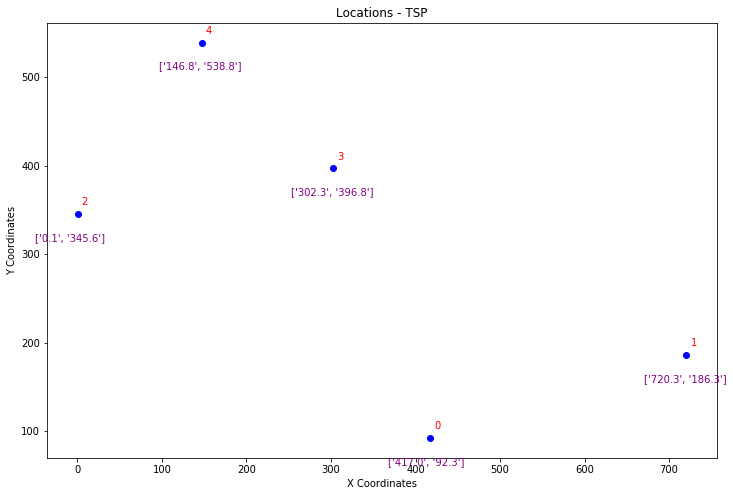

In [148]:
plotMap(x_coordinate, y_coordinate)

In [149]:
distance={}
for i in range(n):
    for j in range(n):
        if i != j:
            distance[i,j] = pythagoras(x_coordinate, y_coordinate,i,j)


## MODELAGEM

In [172]:
#Defining the model problem
model = Model('Traveling Salesman Problem')

In [173]:
x=model.binary_var_dict(paths,name='x')
c=model.continuous_var_dict(location,name='c')

In [174]:
model.minimize(model.sum(distance[i]*x[i] for i in paths))

In [175]:
for l in location:
    model.add_constraint(model.sum(x[(i,j)] for i,j in paths if i==l)==1)

In [176]:
for l in location:
    model.add_constraint(model.sum(x[(i,j)] for i,j in paths if j==l)==1)

In [177]:
# Logical Restriction
for i,j in paths:
    if j!=0:
        model.add_indicator(x[(i,j)],c[i]+1==c[j])

In [178]:
print(model.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Traveling Salesman Problem

Minimize
 obj: 317.500000000000 x_0_1 + 487.800000000000 x_0_2 + 325.400000000000 x_0_3
      + 521.900000000000 x_0_4 + 317.500000000000 x_1_0 + 737.600000000000 x_1_2
      + 468 x_1_3 + 673.200000000000 x_1_4 + 487.800000000000 x_2_0
      + 737.600000000000 x_2_1 + 306.500000000000 x_2_3 + 242.600000000000 x_2_4
      + 325.400000000000 x_3_0 + 468 x_3_1 + 306.500000000000 x_3_2
      + 210.600000000000 x_3_4 + 521.900000000000 x_4_0 + 673.200000000000 x_4_1
      + 242.600000000000 x_4_2 + 210.600000000000 x_4_3
Subject To
 c1: x_0_1 + x_0_2 + x_0_3 + x_0_4 = 1
 c2: x_1_0 + x_1_2 + x_1_3 + x_1_4 = 1
 c3: x_2_0 + x_2_1 + x_2_3 + x_2_4 = 1
 c4: x_3_0 + x_3_1 + x_3_2 + x_3_4 = 1
 c5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1
 c6: x_1_0 + x_2_0 + x_3_0 + x_4_0 = 1
 c7: x_0_1 + x_2_1 + x_3_1 + x_4_1 = 1
 c8: x_0_2 + x_1_2 + x_3_2 + x_4_2 = 1
 c9: x_0_3 + x_1_3 + x_2_3 + x_4_3 = 1
 c10: x_

In [179]:
solution = model.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve modified 6 coefficients.
Aggregator did 6 substitutions.
Reduced MIP has 20 rows, 35 columns, and 70 nonzeros.
Reduced MIP has 20 binaries, 0 generals, 0 SOSs, and 16 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Found incumbent of value 1726.500000 after 0.01 sec. (0.17 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Tried aggregator 1 time.
Reduced MIP has 20 rows, 35 columns, and 70 nonzeros.
Reduced MIP has 20 binaries, 0 generals, 0 SOSs, and 16 indicators.
Presolve time = 0.00 sec. (0.05 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Clique table members: 16.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (0.03 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*   

In [180]:
model.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [181]:
solution.display()

solution for: Traveling Salesman Problem
objective: 1726.500
x_0_1 = 1
x_1_3 = 1
x_2_0 = 1
x_3_4 = 1
x_4_2 = 1
c_1 = 1.000
c_2 = 4.000
c_3 = 2.000
c_4 = 3.000


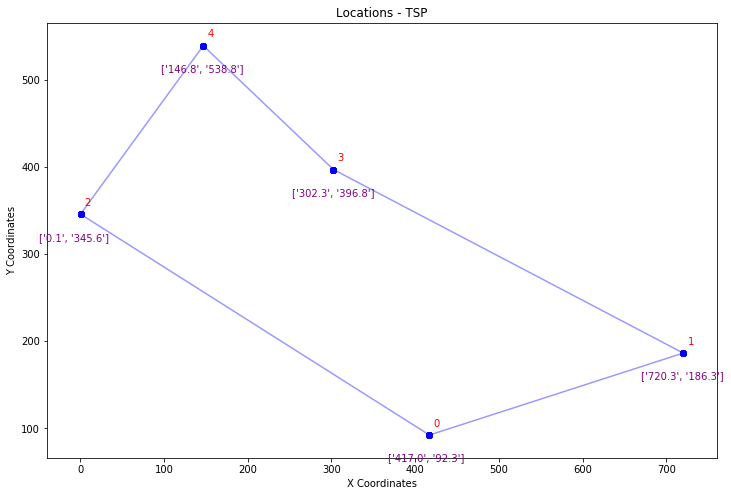

In [182]:
plotMapFinal(x_coordinate,y_coordinate,x,paths)